## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 5
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice wrangling data
3. (challenge) do a mini data analysis of your own!

----------------------------------------------------------

This homework has **7 questions** from the lecture and **2 Problems**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

In [248]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the raw data:

* Data from two hotels: one resort and one city hotel
* Observations: Each row represents a hotel booking
* Goal for original data collection: Development of prediction models to classify a hotel booking's likelihood to be canceled [Antonia et al., 2019](https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5)


[Data Information: Tidy Tuesday](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

In [250]:
file_location = 'https://joannabieri.com/introdatascience/data/hotels.csv'
DF_raw_hotels = pd.read_csv(file_location)

In [291]:
show(DF_raw_hotels)

**Q1** Can you figure out how you would focus on multiple columns? We have done this before so see if you can remember the command. It's okay if you need to copy and paste!

In [253]:
# Your code here
my_columns = ['hotel', 'country']
my_counts = DF_raw_hotels[my_columns].value_counts()
show(my_counts)

#### Sorting Example - Descending order

In [255]:
my_columns = ['hotel','lead_time']
DF_lead_time_sorted = DF_raw_hotels[my_columns].sort_values('lead_time', ascending=False)
show(DF_lead_time_sorted)

**Q2** Choose another set of variables (columns) that you can explore. Try sorting them ascending and descending.

In [295]:
# Your code here:
my_columns = ['stays_in_weekend_nights','stays_in_week_nights']
DF_lead_time_sorted = DF_raw_hotels[my_columns].sort_values('stays_in_week_nights', ascending=True)
show(DF_lead_time_sorted)

**Q3** What would happen if you tried to sort categorical data? Try sorting by the column "arrival_date_month". Do you get an error? Does it sort it? If so how is it sorted?
I didn't get any error, and it did sort just as the other ones

In [297]:
# Your code here:
my_columns = ['arrival_date_month']
DF_lead_time_sorted = DF_raw_hotels[my_columns].sort_values('arrival_date_month', ascending=True)
show(DF_lead_time_sorted)

### Boolean Mask Example - Subsellect Data

Here is an example of focusing only on 'Resort Hotel' data in the 'hotel' column

In [351]:
my_columns = ['hotel']
DF_lead_time_sorted = DF_raw_hotels[my_columns].sort_values('hotel', ascending=True)
show(DF_lead_time_sorted)

**Problem 1** Can you create a data frame that:

1. Selects the columns "hotel", "year", and "month"
2. Sorts by year ascending.
3. Masks to only show the month of "August"

In [379]:
# Your code here
my_columns = ['hotel', 'arrival_date_year', 'arrival_date_month']
DF_lead_time_sorted = DF_raw_hotels[my_columns].sort_values('hotel', ascending=True)
show(DF_lead_time_sorted)
mask  = DF_raw_hotels[['arrival_date_month']] !='August'
show(DF_raw_hotels[mask])

#### Basic Operators

| Operator | Definition |
|----------|------------|
|<|less than|
|>|greater than|
|<=| less than or equal to|
|>=| greater than or equal to|
|==| exactly equal to|
|!=| not equal to|

#### Advanced Operators

| Operator | Definition |
|----------|------------|
| and | check if two things are both true|
| or | check if one of two things is true|
| in | checks if something is in another thing|
| ! | not checks if something is false|

**Q4** Try to say whether each cell will print true or false before running the code:

In [381]:
3<10

True

In [383]:
10<3

False

In [385]:
3<10 and 2<10

True

In [387]:
'cat' == 'cat'

True

In [389]:
'CAT'=='cat'

False

In [391]:
'CAT'!='cat'

True

In [393]:
2<=2

True

In [395]:
2<=2 or 2<1

True

In [397]:
my_numbers = [3,6,18,42]
42 in my_numbers

True

**Q5** Create 5 more logical operator tests and show the results.

In [399]:
# Your code here
my_numbers = [4,34,5,78,678,7]
21 in my_numbers

False

In [401]:
# Your code here
'school'== 'SCHOOL'

False

In [403]:
# Your code here
2<15 == 15>2

True

In [405]:
# Your code here
123<45

False

In [407]:
# Your code here
'home' == 'Home'

False

### Follow Along - Example Analysis

Now that we know some logical operators we can create fancier boolean masks and get more interesting subsets of our data. Here is a mini analysis of our data using what we know so far. See if you can figure out what each command is doing. 

**Q6** Add your comments explaining the code:


In [424]:
# Add your comments: 
DF_raw_hotels['country'].value_counts()
#The code is counting only the country data

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

Wow there is a lot of data for PRT (Portugal)!

In [426]:
# Here I am defining the variables (columns) I care about
my_country = 'PRT'
my_columns = ['hotel',
              'arrival_date_year',
              'is_canceled', 
              'arrival_date_month',
              'country']
sort_column = 'arrival_date_year'

# Add your comments:
DF_mini_analysis = DF_raw_hotels[my_columns].sort_values(sort_column).copy()
show(DF_mini_analysis)
#this code is showing the data

In [428]:
# What does this first mask do?
# Your comments:
mask_country = DF_mini_analysis['country']==my_country
DF_mini_analysis_masked = DF_mini_analysis[mask_country]
show(DF_mini_analysis_masked)
#the mask is showing only data from PRT

In [419]:
# What does this second mask do?
# Your comments:
mask_years = DF_mini_analysis_masked['arrival_date_year']>2015
DF_mini_analysis_masked = DF_mini_analysis_masked[mask_years] 
# Notice that I wrote over my data in the command above
#The mask is showing the dates after 2015
show(DF_mini_analysis_masked)

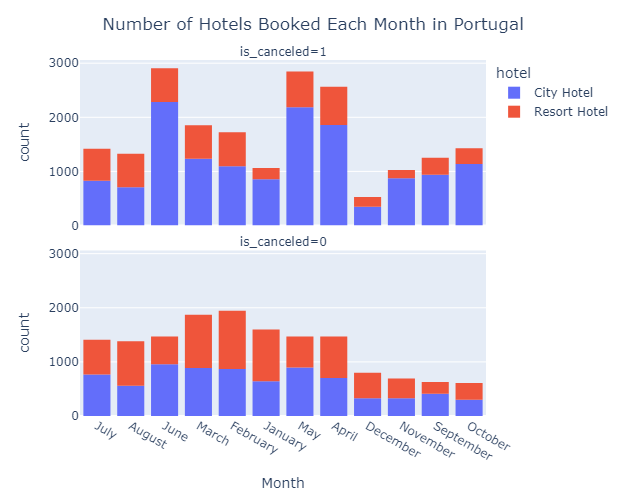

In [421]:
fig = px.histogram(DF_mini_analysis_masked,
                  x='arrival_date_month',
                  color='hotel',
                  facet_col='is_canceled',
                  facet_col_wrap=1)

fig.update_layout(title='Number of Hotels Booked Each Month in Portugal',
                  title_x=0.5,
                  xaxis_title="Month",
                  autosize=False,
                  width=800,
                  height=500)
fig.show()

**Q7** What exactly is this histogram showing and what is excluded based on the analysis we did above? Is there anything interesting about the graph? Any questions raised?

The data is showing the canceled booked each month in portugal

**Problem 2** Now it's your turn to do a mini analysis. Please do the following:

1. Choose a subset of columns that you are interested in and look just at those column.
2. Make at least one mask that will remove some of the data (eg. look only at one categorical value OR one or more numerical values.
3. Sort the data using one of the columns.
4. Make a histogram or bar graph of your final data set.
5. Describe in words what you see in your graph, or if there is anything interesting there.

In [432]:
# Your code here - you will probably need more than one cell
my_columns = ['hotel','lead_time', 'country']
DF_lead_time_sorted = DF_raw_hotels[my_columns].sort_values('lead_time', ascending=False)
show(DF_lead_time_sorted)

In [506]:
#Make at least one mask that will remove some of the data
#(eg. look only at one categorical value OR one or more numerical values.
DF_raw_hotels['hotel'] =DF_raw_hotels['country']
DF_raw_hotels
mask = (DF_raw_hotels['country']=='USA') | (DF_raw_hotels['country']=='GBR')
DF_raw_hotels[mask]

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
2        GBR            0          7               2015               July   
3        GBR            0         13               2015               July   
4        GBR            0         14               2015               July   
5        GBR            0         14               2015               July   
12       USA            0         68               2015               July   
...      ...          ...        ...                ...                ...   
119358   USA            0        135               2017             August   
119369   GBR            0        207               2017             August   
119378   GBR            0        247               2017             August   
119379   GBR            0        109               2017             August   
119388   GBR            0        109               2017             August   

        arrival_date_week_number  arrival_date_day_of_month  \
2                             27                          1   
3                             27                          1   
4                             27                          1   
5                             27                          1   
12                            27                          1   
...                          ...                        ...   
119358                        35                         30   
119369                        34                         25   
119378                        35                         31   
119379                        35                         31   
119388                        35                         31   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
2                             0                     1       1  ...   
3                             0                     1       1  ...   
4                             0                     2       2  ...   
5                             0                     2       2  ...   
12                            0                     4       2  ...   
...                         ...                   ...     ...  ...   
119358                        1                     4       2  ...   
119369                        3                     7       2  ...   
119378                        1                     3       2  ...   
119379                        1                     3       2  ...   
119388                        2                     5       2  ...   

        deposit_type  agent company days_in_waiting_list customer_type  \
2         No Deposit    NaN     NaN                    0     Transient   
3         No Deposit  304.0     NaN                    0     Transient   
4         No Deposit  240.0     NaN                    0     Transient   
5         No Deposit  240.0     NaN                    0     Transient   
12        No Deposit  240.0     NaN                    0     Transient   
...              ...    ...     ...                  ...           ...   
119358    No Deposit   14.0     NaN                    0     Transient   
119369    No Deposit   14.0     NaN                    0     Transient   
119378    No Deposit   42.0     NaN                    0     Transient   
119379    No Deposit    9.0     NaN                    0     Transient   
119388    No Deposit   89.0     NaN                    0     Transient   

           adr  required_car_parking_spaces  total_of_special_requests  \
2        75.00                            0                          0   
3        75.00                            0                          0   
4        98.00                            0                          1   
5        98.00                            0                          1   
12       97.00                            0                          3   
...        ...                          ...                        ...   
119358  143.10                            0                      

In [500]:
#Sort the data using one of the columns.
my_columns = ['hotel']
DF_lead_time_sorted = DF_raw_hotels[my_columns].sort_values('hotel', ascending=True)
show(DF_lead_time_sorted)

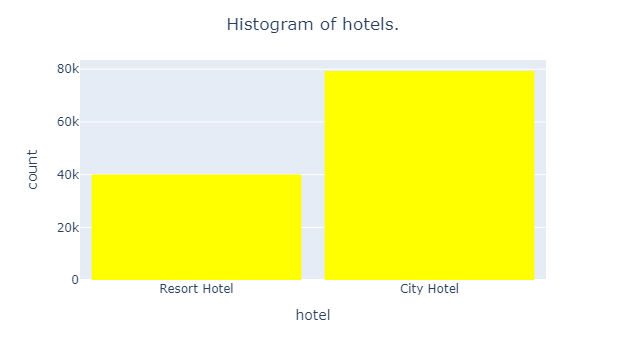

In [498]:
#Make a histogram or bar graph of your final data set.
fig = px.histogram(DF_raw_hotels,
                   nbins=2,
                   x='hotel',
                   color_discrete_sequence=['yellow'])

fig.update_layout(bargap=0.1,
                  title='Histogram of hotels.',
                  title_x=0.5)
fig.show()


In [511]:
#Describe in words what you see in your graph, 
#or if there is anything interesting there.
#I see the word resort hotel and city hotel,
#I'm seeing theres more costumers in city hotels than resort hotels

# End Of Homework

### Everything below here is extra - just so you have a copy of the code I showed in lecture.

### Excluding variables - removing one column (Extra)

There are a few ways to get rid of columns. The first would be to write down ALL the columns and leave out one. Let's say we want to leave out information about the "agent" variable.

In [443]:
# First get all of them
my_columns = list(DF_raw_hotels.keys())
# Then remove the one you don't want
my_columns.remove('agent')
# Then get the new data frame
DF_raw_hotels[my_columns]

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
0                          0       2  ...                3    No Deposit   
1                          0       2  ...                4    No Deposit   
2                          1       1  ...                0    No Deposit   
3                          1       1  ...                0    No Deposit   
4                          2       2  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
119385                     5       2  ...                0    No Deposit   
119386                     5       3  ...                0    No Deposit   
119387                     5       2  ...                0    No Deposit   
119388                     5       2  ...                0    No Deposit   
119389                     7       2  ...                0    No Deposit   

       company days_in_waiting_list customer_type     adr  \
0          NaN                    0     Transient    0.00   
1          NaN                    0     Transient    0.00   
2          NaN                    0     Transient   75.00   
3          NaN                    0     Transient   75.00   
4          NaN                    0     Transient   98.00   
...        ...                  ...           ...     ...   
119385     NaN                    0     Transient   96.14   
119386     NaN                    0     Transient  225.43   
119387     NaN                    0     Transient  157.71   
119388     NaN                    0     Transient  104.40   
119389     NaN                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                         

### Fancy ways to get columns (Extra - ADVANCED)

There are fancy ways to get a list of columns that you might be interested in.

#### Starts with

You can use the command **startswith()** to check if a variable starts with a word or part of a word. Here is code to get only columns that start with the word "arrival":

In [445]:
# Get the list of all the columns
columns_list = list(DF_raw_hotels.keys())
# Get true false values using the startswith() comand
column_mask = [column.startswith('arrival') for column in columns_list]
# Mask the column names to get just the ones you want and make a list
my_columns = list(DF_raw_hotels.keys()[column_mask])
print(my_columns)

['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']


#### Ends with

You can use the command **endswith()** to check if a variable ends with a word or part of a word. Here is code to get only columns that end with the word "type":

In [449]:
# Get the list of all the columns
columns_list = list(DF_raw_hotels.keys())
# Get true false values using the startswith() comand
column_mask = [column.endswith('type') for column in columns_list]
# Mask the column names to get just the ones you want and make a list
my_columns = list(DF_raw_hotels.keys()[column_mask])
print(my_columns)

['reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']


#### IN

You can use the Python check  **is in** to check if a variable contains a word or part of a word. Here is code to get only columns that contain the word "date":

In [451]:
# Get the list of all the columns
columns_list = list(DF_raw_hotels.keys())
# Get true false values using the startswith() comand
column_mask = ["date" in column for column in columns_list]
# Mask the column names to get just the ones you want and make a list
my_columns = list(DF_raw_hotels.keys()[column_mask])
print(my_columns)

['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'reservation_status_date']
